<a href="https://colab.research.google.com/github/morrison98/sic_ai_2025_jun/blob/main/03machinelearning/contribuciones_estudiantes/clase_19_limpio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preparación de datasets para el ejercicio**

1. Subir el archivo `kaggle.json` a Google Colab

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sebastianbarison","key":"84b975d099c45a52a94b5db16b267879"}'}

2. Configurar las credenciales en Colab

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

3. Descargar el dataset desde Kaggle

In [3]:
# Dataset Student Alcohol Consumption
!kaggle datasets download -d uciml/student-alcohol-consumption
!unzip student-alcohol-consumption.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption
License(s): CC0-1.0
  0% 0.00/18.4k [00:00<?, ?B/s]
100% 18.4k/18.4k [00:00<00:00, 70.5MB/s]
Archive:  student-alcohol-consumption.zip
  inflating: student-mat.csv         
  inflating: student-merge.R         
  inflating: student-por.csv         


In [4]:
# Dataset Student Performance
!kaggle datasets download -d spscientist/students-performance-in-exams
!unzip students-performance-in-exams.zip

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 21.1MB/s]
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


## Parte 1: Exploración y Preprocesamiento de Datos

1. **Carga de datos**
   - Cargar el dataset seleccionado utilizando `pandas`.
   - Sugerencia: utilizar el dataset "Student Performance" de Kaggle o un dataset simulado con variables académicas y demográficas.


In [5]:
import pandas as pd

In [6]:
# Del dataset Student performance
df_stu_per = pd.read_csv('StudentsPerformance.csv')

In [7]:
# Del dataset Student Alcohol Consumption
df_stu_mat = pd.read_csv('student-mat.csv')
df_stu_por = pd.read_csv('student-por.csv')

2. **Revisión inicial**
   - Analizar estructura del dataset, tipos de datos, valores nulos y estadísticas descriptivas.
   - Identificar columnas relevantes para el análisis.

In [8]:
df_stu_per.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df_stu_per.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
df_stu_per.shape

(1000, 8)

In [11]:
df_stu_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df_stu_per.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df_stu_per.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Del dataset "studentPerformance.csv" se puede observar que tiene una forma de 8 columnas y 1000 filas.

De la gran cantidad de datos, las variables (columnas) que podrían tener un efecto en las notas finales serían:

**- Math score, reading score y writing score**: Las notas necesarias para calcular la nota final.

**- Test preparation course**: Un curso de preparación previa a las pruabas (o tutoría podría tener un efecto directo en las notas)

**- Parents level of education**: Al tener un nivel mas alto de educación, su ayuda podría tener efecto en las notas (provisto que ellos entreguen dicha ayuda)

In [14]:
df_stu_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
df_stu_mat.shape

(395, 33)

In [16]:
df_stu_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [17]:
df_stu_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_stu_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [18]:
df_stu_mat.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


Del dataset "student-mat.csv", se puede observar una mayor cantidad de variables (33 columnas), pero una menor cantidad de entradas (395 filas).

De este dataset, las variables que podrían tener relevancia para el análisis son:

**- G1, G2, y G3:** Las notas obtenidas en el primer, segundo y tercer periodo del año, necesarias para calcular y predecir una nota final.

**- Medu y Fedu:** El nivel de educación de la madre y el padre

**- studytime:** El tiempo dedicado al estudio

**- schoolsup y famsup:** El apoyo recibido de la escuela y la familia.

**- absences:** Las ausencias registradas

In [19]:
df_stu_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [20]:
df_stu_por.shape

(649, 33)

In [21]:
df_stu_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [22]:
df_stu_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [23]:
df_stu_mat["absences"].unique()


array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17])

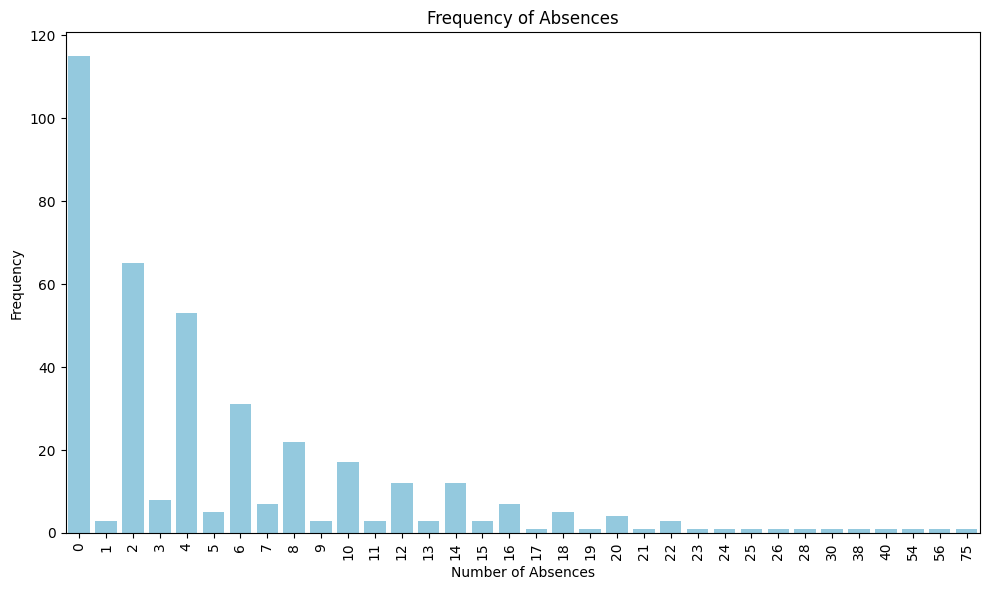

In [24]:
# prompt: Realiza un gráfico de frecuencia de los valores unicos de absences

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of unique values in 'absences'
absences_counts = df_stu_mat['absences'].value_counts().sort_index()

# Create a bar plot of the frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=absences_counts.index, y=absences_counts.values, color='skyblue')
plt.xlabel('Number of Absences')
plt.ylabel('Frequency')
plt.title('Frequency of Absences')
plt.xticks(rotation=90) # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Del dataset "student-por.csv" se observó un total de 33 columnas y 649 filas.

De este dataset, las variables que podrían tener relevancia para el análisis son:

**- G1, G2, y G3:** Las notas obtenidas en el primer, segundo y tercer periodo del año, necesarias para calcular y predecir una nota final.

**- Medu y Fedu:** El nivel de educación de la madre y el padre

**- studytime:** El tiempo dedicado al estudio

**- schoolsup y famsup:** El apoyo recibido de la escuela y la familia.

**- absences:** Las ausencias registradas

3. **Visualización de datos**
   - Realizar gráficos que ayuden a comprender la distribución y relación entre variables, por ejemplo:
     - Boxplot de `final_grade` según `tutoring` (participación en tutorías).
     - Histograma de `motivation_score`.
     - Diagrama de dispersión entre `study_hours` y `final_grade`.

<Axes: xlabel='test preparation course', ylabel='final grade'>

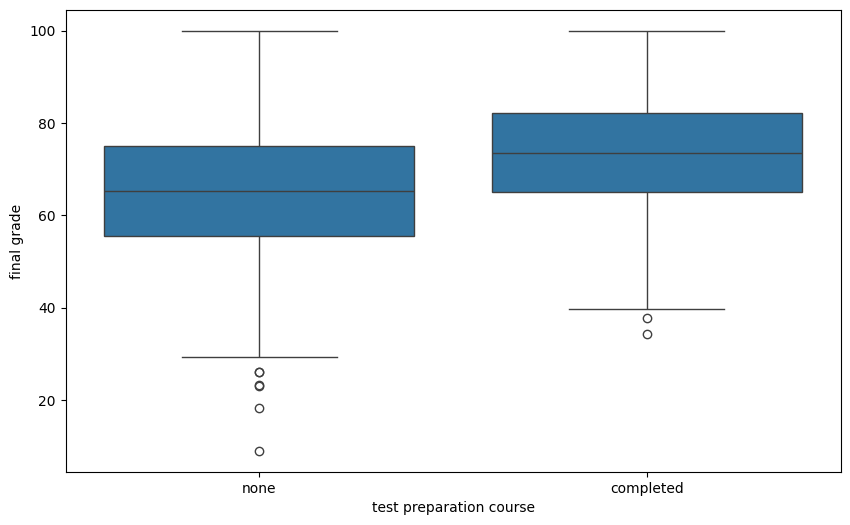

In [25]:
# Boxplot de final_grade según tutoring

# Primero se crea la variable "final grade" a partir del promedio de las notas
df_stu_per["final grade"] = (df_stu_per["math score"] +
                             df_stu_per["reading score"]
                             + df_stu_per["writing score"]) / 3

# Después se identifica que "tutoring" o "tutoría" sería el equivalente a "test preparation course"

# Con las variables identificadas, se Crea el boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="test preparation course", y="final grade", data=df_stu_per)

De este gráfico se puede observar que los estudiantes que realizaron turoría mostraron una nota mas alta con mayor frecuencia, además que los outliers sólo se observan con notas mas bajas.

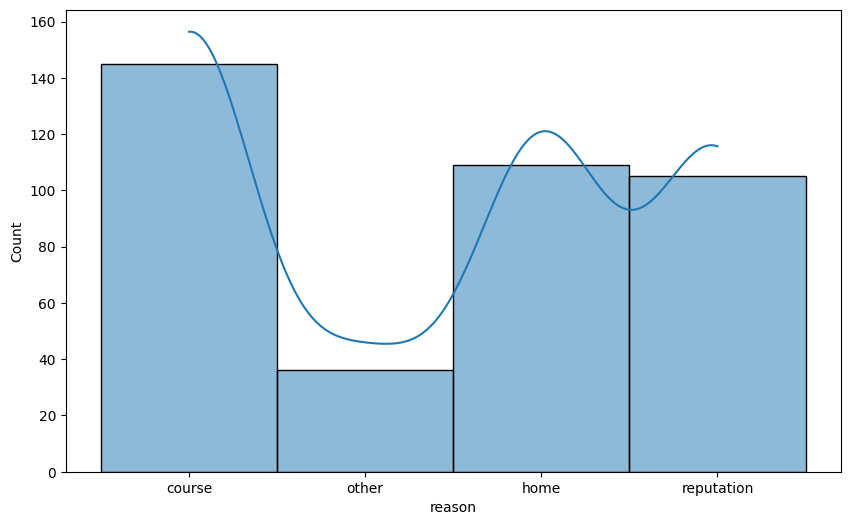

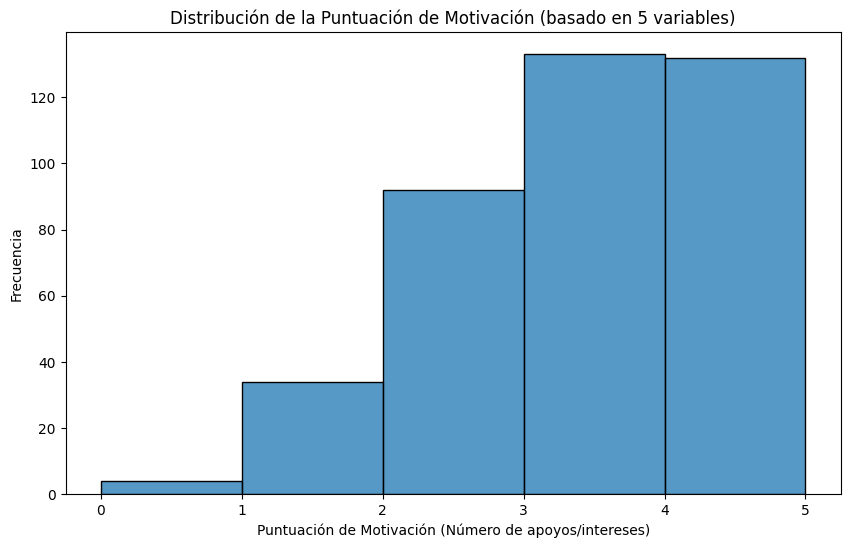

In [26]:
# Histograma de motivation_score.

# Para poder desarrollar este gráfico, es necesario determinar que se considera
# como "motivation_score"

# Opción 1- motivation_score se refiere a la variable "reason" que describen la
# razón por qué se elije la escuela: close to 'home', school 'reputation',
# 'course' preference or 'other'.

plt.figure(figsize=(10, 6))
sns.histplot(df_stu_mat['reason'], bins=30, kde=True)

# Opción 2- motivation_score se refiere a una sumatoria de los valroes numéricos
# asignados a otras variables como "famsup", "schoolsup", "paid", "nursery" y
# "higher"

df_stu_mat['motivation_score'] = df_stu_mat[['famsup', 'schoolsup', 'paid', 'nursery', 'higher']].apply(
    lambda row: (row == 'yes').sum(), axis=1
)

plt.figure(figsize=(10, 6))
sns.histplot(df_stu_mat['motivation_score'], bins=5, kde=False, stat='count') # Score va de 0 a 5
plt.title('Distribución de la Puntuación de Motivación (basado en 5 variables)')
plt.xlabel('Puntuación de Motivación (Número de apoyos/intereses)')
plt.ylabel('Frecuencia')
plt.xticks(range(6))
plt.show()

Text(0, 0.5, 'Nota Final')

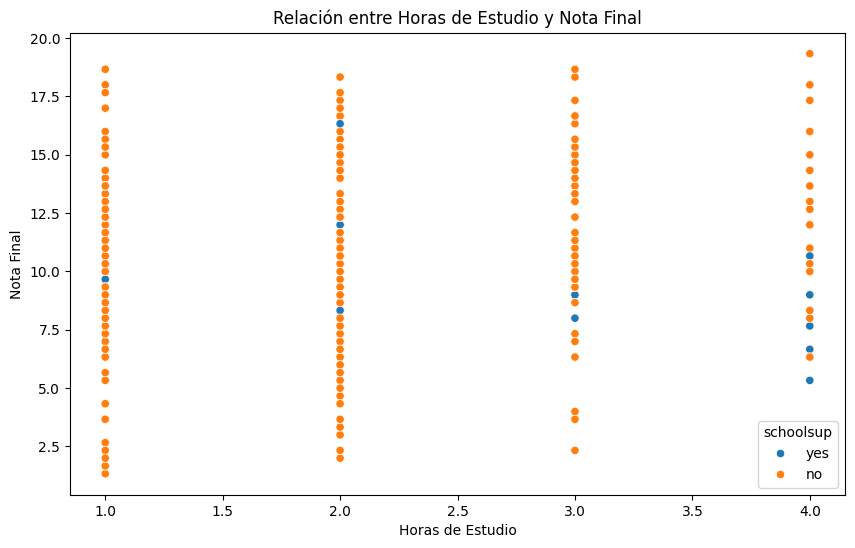

In [27]:
# Diagrama de dispersión entre study hours and final grade

# Primero, definir que "study hours" se refiere a la variable "studytime"
# Segundo, definir la variable "final grade" como el promedio de las notas G1,
# G2 y G3
df_stu_mat["final grade"] = (df_stu_mat["G1"] +
                             df_stu_mat["G2"]
                             + df_stu_mat["G3"]) / 3

# Tercero, desarrollar el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='studytime', y='final grade', data=df_stu_mat, hue='schoolsup')
plt.title('Relación entre Horas de Estudio y Nota Final')
plt.xlabel('Horas de Estudio')
plt.ylabel('Nota Final')

<Axes: xlabel='sex', ylabel='final grade'>

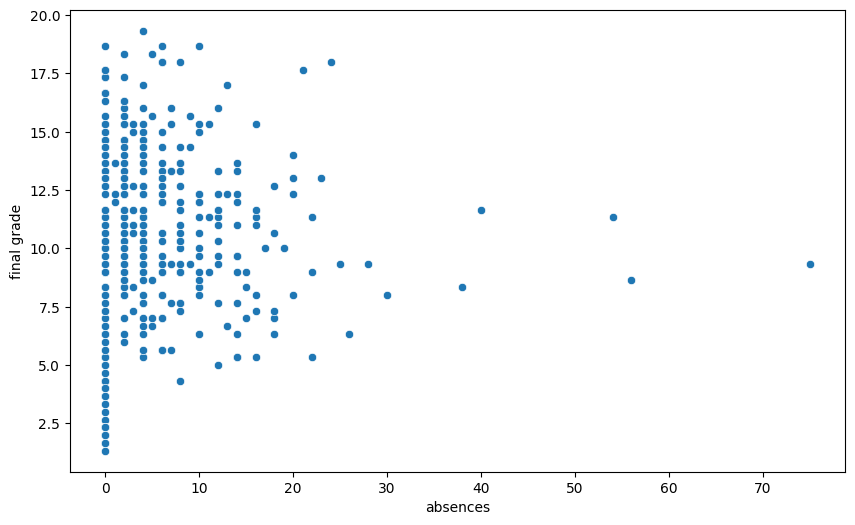

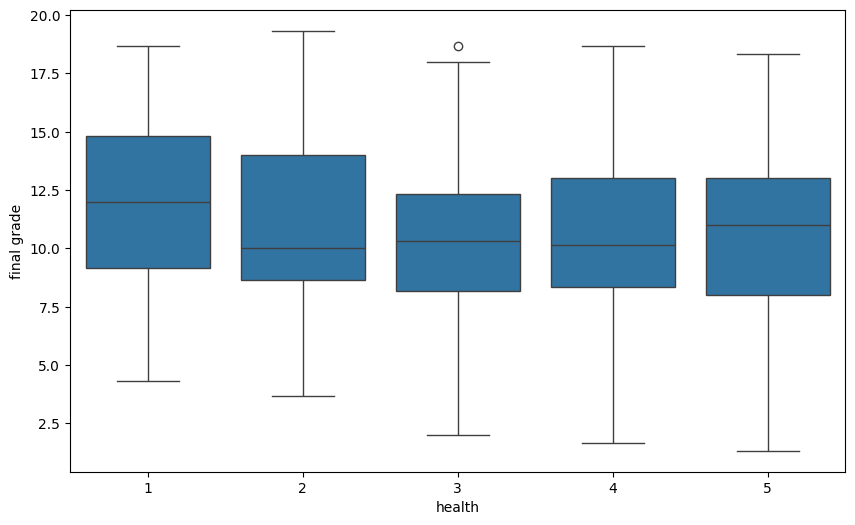

<Figure size 1000x600 with 0 Axes>

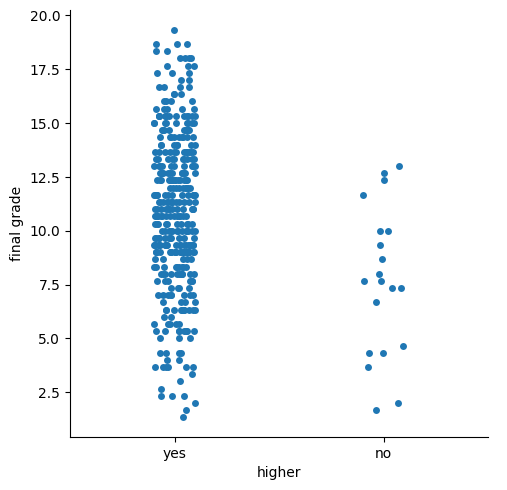

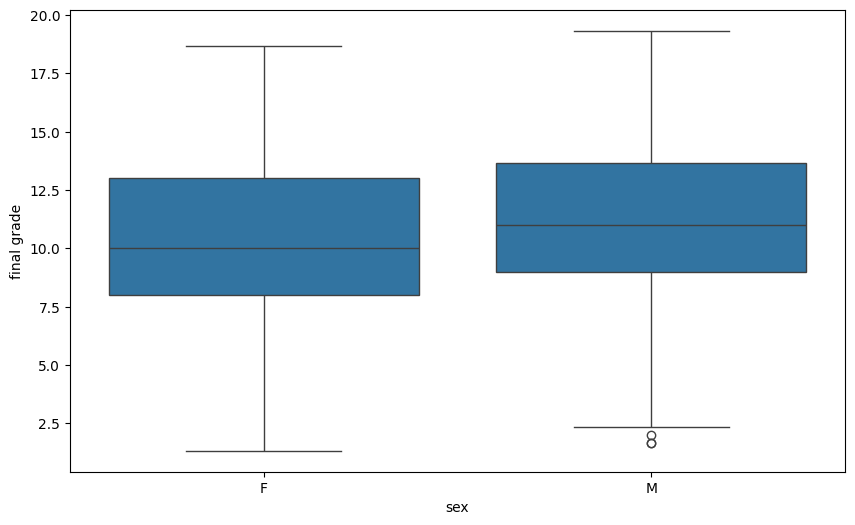

In [28]:
# Otros gráficos que podrían servir para comprender la relación entre variables

# 1. Ausencias y nota final
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences', y='final grade', data=df_stu_mat)

# 2. Salud de estudiantes y su nota final
plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='final grade', data=df_stu_mat)

# 3. Ambición de estudiar educación superior y notas finales
plt.figure(figsize=(10, 6))
sns.catplot(x='higher', y='final grade', data=df_stu_mat)

# 4. Género y nota final
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='final grade', data=df_stu_mat)

4. **Preprocesamiento**
   - Codificar variables categóricas con `LabelEncoder` o `pd.get_dummies()`.
   - Normalizar variables numéricas si es necesario.
   - Verificar y manejar outliers si corresponde.

In [29]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns from df_stu_mat
categorical_cols = df_stu_mat.select_dtypes(include='object').columns

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df_stu_mat[col] = le.fit_transform(df_stu_mat[col])

# Display the first few rows to show the changes
display(df_stu_mat.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,motivation_score,final grade
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,3,5.666667
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,2,5.333333
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,4,8.333333
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,4,14.666667
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,4,8.666667


## Parte 2: Modelos Supervisados (Clasificación)

### Objetivo:
Predecir si un estudiante aprobará el curso, a partir de un umbral en la nota final (por ejemplo, >=10).

1. **Creación de variable objetivo**









In [30]:
# Como trabajo con 2 datasets distintos, la variable de aprobación variará
# dependiendo del rango de puntajes

# Para el dataset df_stu_per:
df_stu_per["approved"] = df_stu_per["final grade"]>=60

# Para el dataset df_stu_mat:
df_stu_mat["approved"] = df_stu_mat["final grade"]>=12

2. **Separación de variables predictoras y objetivo**
   - Definir `X` e `y`.
   - Dividir los datos en conjunto de entrenamiento y prueba utilizando `train_test_split`.

In [31]:
# Los modelos realizados con df_stu_mat:
y = df_stu_mat['approved']
x = df_stu_mat.drop('approved', axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


3. **Entrenamiento de modelos**
   - Entrenar al menos tres clasificadores diferentes:
     - Regresión logística (`LogisticRegression`)
     - Vecinos más cercanos (`KNeighborsClassifier`)
     - Árbol de decisión (`DecisionTreeClassifier`)

In [32]:
# Regresión logística:
from sklearn.linear_model import LogisticRegression
# Codificar variables categóricas
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
# Asegurarse de que ambos conjuntos tengan las mismas columnas después de get_dummies
x_train, x_test = x_train.align(x_test, join='inner', axis=1, fill_value=0)
# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000) # Aumenta max_iter si es necesario
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# KNN:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # Número de vecinos (n_neighbors)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
# Árbol de decisión:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

4. **Evaluación de modelos**
   - Calcular y reportar las siguientes métricas:
     - Accuracy
     - Precisión
     - Recall
     - F1-score
     - Matriz de confusión

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Primero se realizan las predicciones de cada modelo
y_pred_log_reg = log_reg.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_dtree = dtree.predict(x_test)

--- Métricas para Regresión Logística ---
Accuracy: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1-score: 1.0000
Matriz de Confusión:
[[60  0]
 [ 0 39]]


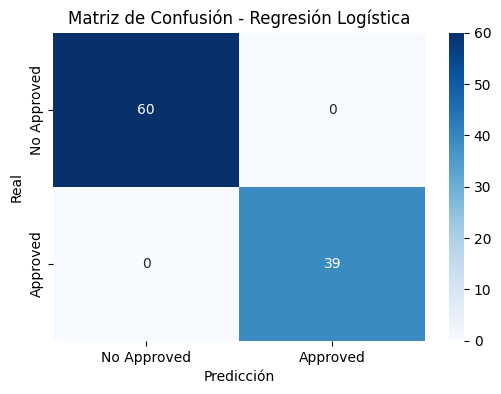

--- Métricas para Vecinos Más Cercanos (KNN) ---
Accuracy: 0.9798
Precisión: 0.9744
Recall: 0.9744
F1-score: 0.9744
Matriz de Confusión:
[[59  1]
 [ 1 38]]


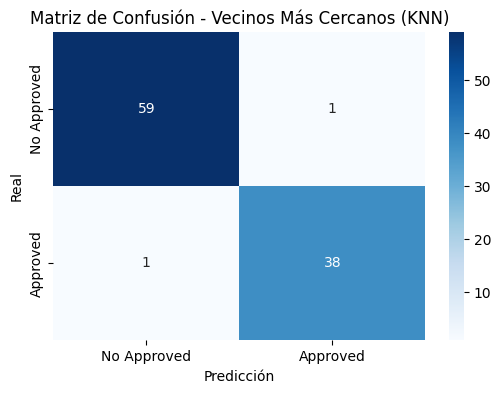

--- Métricas para Árbol de Decisión ---
Accuracy: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1-score: 1.0000
Matriz de Confusión:
[[60  0]
 [ 0 39]]


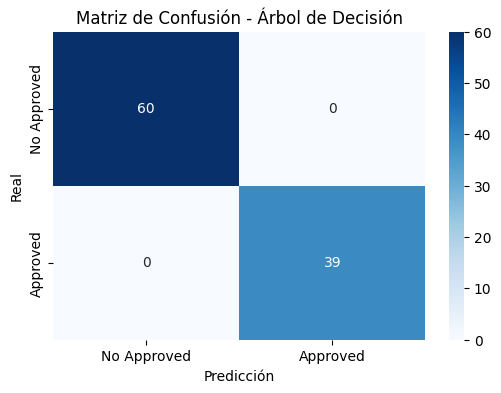

In [36]:
# Función para evaluar y reportar métricas
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"--- Métricas para {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Approved', 'Approved'], yticklabels=['No Approved', 'Approved'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Evaluar y reportar para cada modelo
evaluate_model(y_test, y_pred_log_reg, "Regresión Logística")
evaluate_model(y_test, y_pred_knn, "Vecinos Más Cercanos (KNN)")
evaluate_model(y_test, y_pred_dtree, "Árbol de Decisión")

5. **Análisis**
   - Comparar el desempeño de los modelos.
   - Identificar las variables más importantes (en el caso del árbol de decisión).
   - Justificar la elección del mejor modelo según los resultados.

In [37]:
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,motivation_score,final grade
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,3,5.666667
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,2,5.333333
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,4,8.333333
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,4,14.666667
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,4,8.666667


Tanto el modelo de regresión logística como el de árbol de desición mostraron resultados 100% precisos.

Por otro lado, el de KNN muestra valores muy cercanos al 100, pero no como los otros modelos.

Que ambos modelos concuerden en métricas de precisión absoluta resalta sospechas sobre la validez de dichos modelos, puesto que estos valores podrían ser específicos de este dataset y, por tanto, ser prueba de overfitting.

Por otro lado, el alto porcentaje de precisión (que no llega al 100%)del KNN lleva a la suposición de que este modelo podría ser el mas válido.

En cuanto al arbol de desición, las variables más importantes para una predicción como esta serían las de nota final y la de aprobación, puesto que la primera es lo que se utilizará para realizar la predicción y la segunda es la que determina el barra que empleará el modelo para determinar las predicciones.

## Parte 3: Modelos No Supervisados (Clustering)

### Objetivo:
Agrupar estudiantes según características similares utilizando técnicas de clustering.

1. **Selección de variables**
   - Seleccionar variables numéricas relevantes: `study_hours`, `absences`, `motivation_score`, `final_grade`.





In [41]:
# Para este modelo, las variables mencionadas sólo se encuentran en el dataset df_stu_mat
# de modo que se utilizará este

# Lo primero es identificar las variables relevantes que se emplearán
# study_hours corresponde a studytime, absences se encuentra en el dataset,
# motivation_score será la variable "schoolsup" y final_grade quedará como está.

df_stu_mat.replace(['yes', 'no'], [1, 0], inplace=True)
selected_columns = df_stu_mat[['studytime', 'absences', 'reason', 'final grade']]
selected_columns_2 = df_stu_mat[['studytime', 'reason', 'final grade']]
selected_columns.head()

,studytime,absences,reason,final grade
0,2,6,0,5.666667
1,2,4,0,5.333333
2,2,10,2,8.333333
3,3,2,1,14.666667
4,2,4,1,8.666667


In [42]:
from sklearn.preprocessing import StandardScaler

# Lo que sigue es la escala y estandarización de los datos.

X = selected_columns
X2 = selected_columns_2
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # estandarizamos los datos
X_scaled_2 = scaler.fit_transform(X2) # estandarizamos los datos

In [43]:
# Se instala estyp
%pip install estyp

3. **K-Means**
   - Probar diferentes valores de `k`.
   - Utilizar el método del codo (elbow method) para seleccionar el número óptimo de clusters.
   - Calcular el `silhouette_score` para validar la coherencia de los grupos.


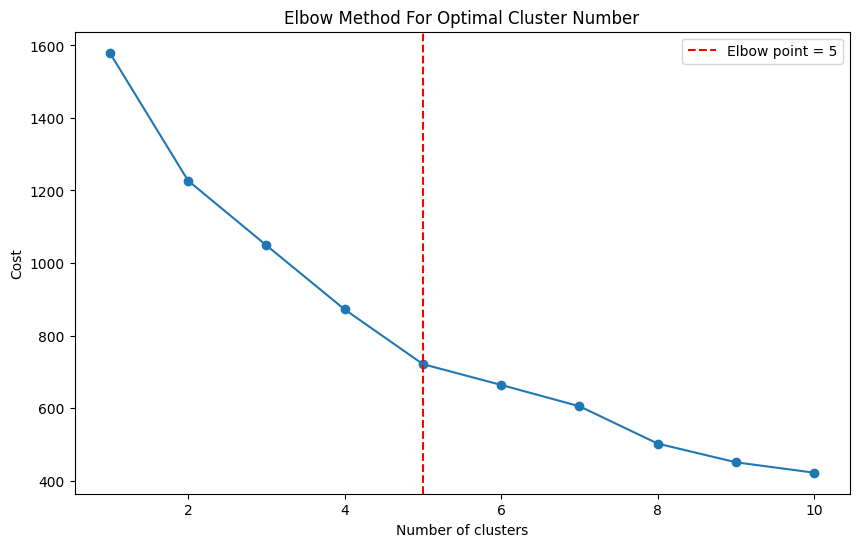

In [44]:
# Y se utiliza el método de codo para buscar el número óptimo de clusters

from sklearn.cluster import KMeans
from estyp.cluster import NClusterSearch

searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(X_scaled) # Ajusta el modelo a los datos estandarizados

abels = searcher.labels_  # Etiquetas de los clusters
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_  # Modelo óptimo
optimal_clusters = searcher.optimal_clusters_  # Número óptimo de clusters

searcher.plot()

In [45]:
# Al conocer el número óptimo de codos, se emplea KMEANS
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=50)
df_stu_mat["Cluster"] = kmeans.fit_predict(X_scaled)

In [46]:
from sklearn.metrics import silhouette_score

# Y se calcula el Silhouette score
silhouette_avg = silhouette_score(X_scaled, df_stu_mat["Cluster"])

print(f"El Silhouette Score es: {silhouette_avg:.4f}")

El Silhouette Score es: 0.2641


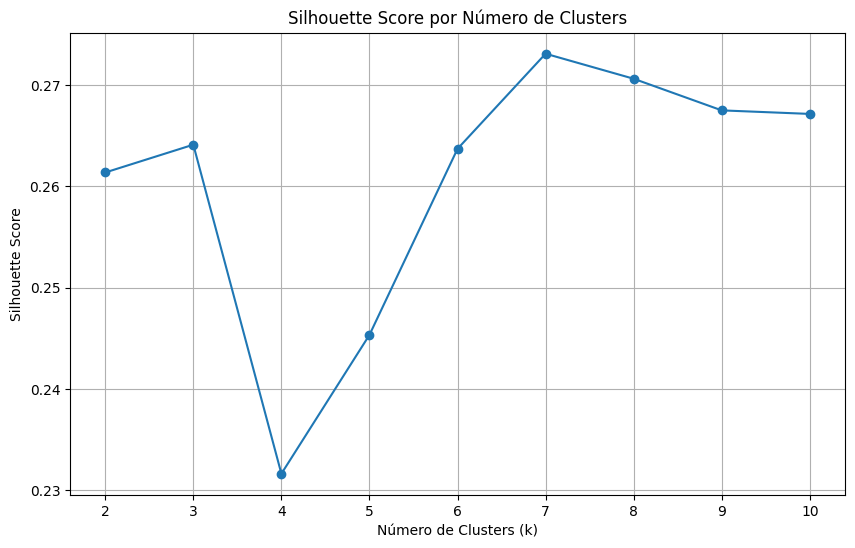

In [47]:
# Y se grafica
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=50)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score por Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

2. **Reducción de dimensionalidad (opcional)**
   - Aplicar PCA si se desea visualizar en 2D o 3D.



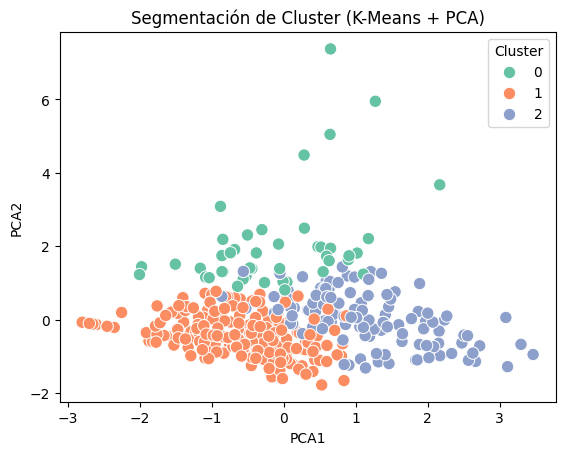

In [48]:
# Acto seguido, se grafica la segmentación de clusters con pca
from sklearn.decomposition import PCA
import seaborn as sns


pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_stu_mat["PCA1"], df_stu_mat["PCA2"] = components[:, 0], components[:, 1]


sns.scatterplot(data=df_stu_mat, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Segmentación de Cluster (K-Means + PCA)")
plt.show()

In [49]:
cluster_summary = df_stu_mat.groupby('Cluster')[['studytime', 'absences', 'schoolsup', 'final grade']].mean()
print("\nCaracterísticas promedio por Cluster:")
cluster_summary


Características promedio por Cluster:


,studytime,absences,schoolsup,final grade
Cluster,,,,
0,1.636364,22.045455,0.113636,9.439394
1,1.909502,3.226244,0.131222,10.150830
2,2.384615,4.400000,0.130769,11.997436


4. **Visualización**
   - Graficar los clusters en dos dimensiones.
   - Analizar las características promedio de cada grupo.
   - Asignar etiquetas interpretativas a los perfiles detectados.


Conteo de estudiantes por Etiqueta de Cluster:
Etiqueta_Cluster
Estudiantes de Alto Rendimiento           221
Estudiantes Promedio                      130
Estudiantes en Riesgo/Con Dificultades     44
Name: count, dtype: int64


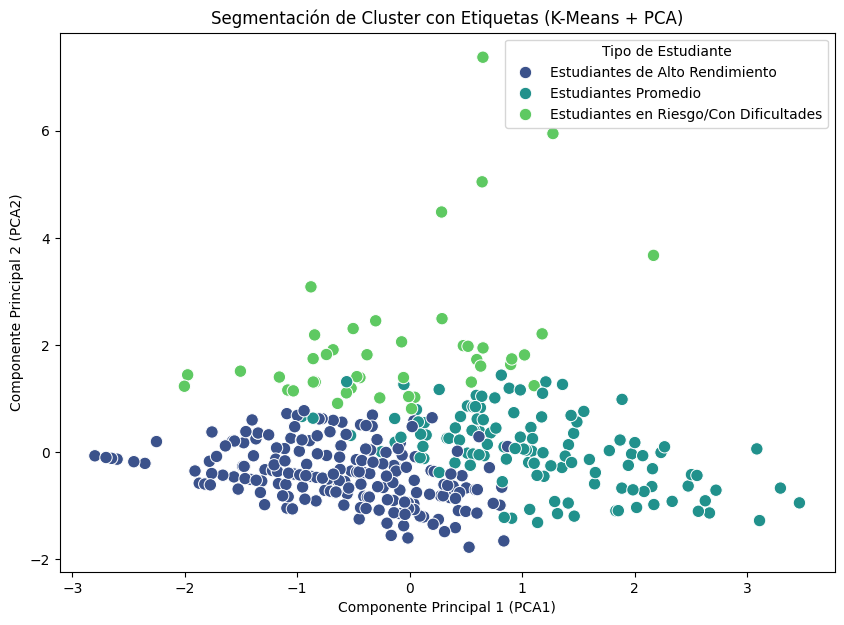


Características promedio por Etiqueta de Cluster:


,studytime,absences,reason,final grade
Etiqueta_Cluster,,,,
Estudiantes Promedio,2.384615,4.400000,2.630769,11.997436
Estudiantes de Alto Rendimiento,1.909502,3.226244,0.402715,10.150830
Estudiantes en Riesgo/Con Dificultades,1.636364,22.045455,1.477273,9.439394


In [52]:
etiquetas_clusters = {
    0: "Estudiantes en Riesgo/Con Dificultades",
    1: "Estudiantes de Alto Rendimiento",
    2: "Estudiantes Promedio"
}

df_stu_mat['Etiqueta_Cluster'] = df_stu_mat['Cluster'].map(etiquetas_clusters)

print("\nConteo de estudiantes por Etiqueta de Cluster:")
print(df_stu_mat['Etiqueta_Cluster'].value_counts())


plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_stu_mat, x="PCA1", y="PCA2", hue="Etiqueta_Cluster", palette="viridis", s=80)
plt.title("Segmentación de Cluster con Etiquetas (K-Means + PCA)")
plt.xlabel("Componente Principal 1 (PCA1)")
plt.ylabel("Componente Principal 2 (PCA2)")
plt.legend(title="Tipo de Estudiante")
plt.show()


cluster_summary_labeled = df_stu_mat.groupby('Etiqueta_Cluster')[['studytime', 'absences', 'reason', 'final grade']].mean()
print("\nCaracterísticas promedio por Etiqueta de Cluster:")
cluster_summary_labeled


5. **Comparación con DBSCAN (opcional)**
   - Probar el algoritmo `DBSCAN` y comparar con K-Means.
   - Analizar la sensibilidad al ruido y detección de outliers.

Número de clusters encontrados por K-Means: 5
Número de clusters encontrados por DBSCAN (excluyendo ruido): 14
Número de puntos de ruido encontrados por DBSCAN: 180
El Silhouette Score para DBSCAN es: 0.3196


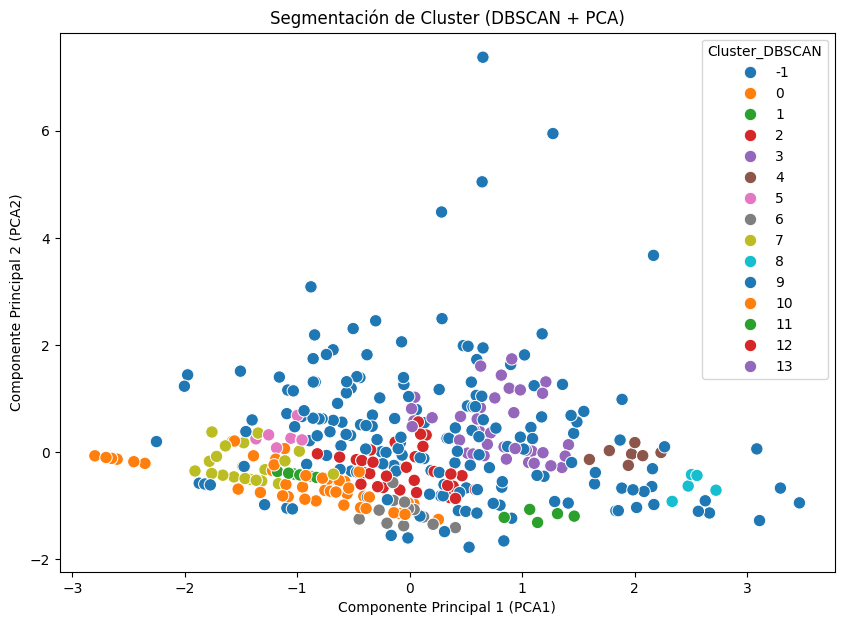


Características promedio por Cluster (DBSCAN):
                studytime   absences  reason  final grade
Cluster_DBSCAN                                           
0                     2.0   2.400000     0.0    10.713333
1                     3.0   1.000000     1.0    15.388889
2                     2.0   2.400000     1.0    11.400000
3                     2.0   4.789474     3.0    11.114035
4                     3.0   5.857143     3.0    13.476190
5                     1.0   4.428571     1.0     8.857143
6                     3.0   2.230769     0.0    10.487179
7                     1.0   2.571429     0.0    10.869048
8                     4.0   4.200000     3.0    12.933333
9                     1.0   0.400000     1.0    13.000000
10                    1.0   0.000000     0.0     3.041667
11                    2.0   0.000000     1.0     5.291667
12                    2.0   1.600000     3.0     5.800000
13                    2.0  13.200000     1.0    11.400000

--- Comparación de K-Me

In [53]:
# prompt: Prueba el algoritmo DBSCAN y comparalo con K-Means

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Probar DBSCAN
# Es importante elegir los parámetros eps y min_samples.
# eps: Distancia máxima entre dos muestras para que una sea considerada como
#      parte de la vecindad de la otra.
# min_samples: Número de muestras en una vecindad para que un punto sea
#              considerado como un punto central (core point).
# Los puntos que no pertenecen a ningún cluster son etiquetados como -1 (ruido).

# Se pueden probar diferentes valores para eps y min_samples
# Una forma común de elegir eps es usando un gráfico de distancias k-vecinas.
# Sin embargo, para este ejemplo, probaremos con valores iniciales.

# DBSCAN es sensible al escalado de los datos, así que usamos los datos escalados.
dbscan = DBSCAN(eps=0.5, min_samples=5) # Parámetros de ejemplo
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Añadir las etiquetas de DBSCAN al DataFrame
df_stu_mat['Cluster_DBSCAN'] = clusters_dbscan

# Comparar con K-Means
# Número de clusters encontrados por K-Means vs DBSCAN
print(f"Número de clusters encontrados por K-Means: {optimal_clusters}")
# Contar el número de clusters distintos encontrados por DBSCAN (excluyendo el ruido -1)
n_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
print(f"Número de clusters encontrados por DBSCAN (excluyendo ruido): {n_clusters_dbscan}")
print(f"Número de puntos de ruido encontrados por DBSCAN: {list(clusters_dbscan).count(-1)}")

# Calcular el Silhouette Score para DBSCAN (si hay más de un cluster y no todos son ruido)
if n_clusters_dbscan > 1:
    # El Silhouette Score se calcula solo para los puntos que no son ruido
    silhouette_avg_dbscan = silhouette_score(X_scaled[clusters_dbscan != -1], clusters_dbscan[clusters_dbscan != -1])
    print(f"El Silhouette Score para DBSCAN es: {silhouette_avg_dbscan:.4f}")
else:
    print("No se puede calcular el Silhouette Score para DBSCAN (menos de 2 clusters válidos).")

# Visualizar los clusters de DBSCAN (usando los componentes PCA para comparación)
plt.figure(figsize=(10, 7))
# Se crea una paleta de colores que incluya el color para el ruido (-1)
palette_dbscan = sns.color_palette("tab10", n_clusters_dbscan + 1)
# Si hay ruido, el último color de la paleta será para -1
hue_order_dbscan = sorted(df_stu_mat['Cluster_DBSCAN'].unique())

sns.scatterplot(data=df_stu_mat, x="PCA1", y="PCA2", hue="Cluster_DBSCAN", palette=palette_dbscan, s=80, legend="full")
plt.title("Segmentación de Cluster (DBSCAN + PCA)")
plt.xlabel("Componente Principal 1 (PCA1)")
plt.ylabel("Componente Principal 2 (PCA2)")
plt.show()

# Análisis de las características promedio por cluster para DBSCAN (excluyendo ruido)
if n_clusters_dbscan > 0:
    cluster_summary_dbscan = df_stu_mat[df_stu_mat['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN')[['studytime', 'absences', 'reason', 'final grade']].mean()
    print("\nCaracterísticas promedio por Cluster (DBSCAN):")
    print(cluster_summary_dbscan)
else:
    print("\nNo hay clusters válidos para resumir en DBSCAN.")

# Comparación y Análisis:
print("\n--- Comparación de K-Means y DBSCAN ---")
print(f"K-Means encontró {optimal_clusters} clusters.")
print(f"DBSCAN encontró {n_clusters_dbscan} clusters y {list(clusters_dbscan).count(-1)} puntos de ruido.")

# Análisis de sensibilidad al ruido:
print("\nAnálisis de Sensibilidad al Ruido:")
print("K-Means asigna cada punto a un cluster, no maneja el ruido explícitamente.")
print(f"DBSCAN identificó {list(clusters_dbscan).count(-1)} puntos como ruido (etiqueta -1).")
print("DBSCAN es bueno para identificar y separar el ruido de los clusters principales.")

# Análisis de detección de outliers:
print("\nAnálisis de Detección de Outliers:")
print("En K-Means, los outliers pueden distorsionar los centroides y la forma de los clusters.")
print("En DBSCAN, los outliers tienden a ser identificados como puntos de ruido (-1), lo que los aísla de los clusters principales.")

# Comentarios sobre los resultados (dependerán de los valores obtenidos)
print("\nAnálisis de los Resultados:")
# Comentar sobre:
# 1. El número de clusters encontrados por cada algoritmo.
# 2. La cantidad de ruido detectada por DBSCAN.
# 3. La interpretación visual de los clusters en los gráficos PCA.
# 4. La comparación de los Silhouette Scores (si son calculables).
# 5. Las características promedio de los clusters encontrados por cada algoritmo.
# 6. Qué algoritmo parece más adecuado para este dataset basado en los resultados y los objetivos (por ejemplo, si la detección de ruido es importante).

if n_clusters_dbscan > 1:
    print(f"Silhouette Score K-Means: {silhouette_avg:.4f}")
    print(f"Silhouette Score DBSCAN: {silhouette_avg_dbscan:.4f}")
    if silhouette_avg_dbscan > silhouette_avg:
        print("DBSCAN parece tener clusters más densos y mejor separados según el Silhouette Score.")
    elif silhouette_avg > silhouette_avg_dbscan:
        print("K-Means parece tener clusters más cohesivos según el Silhouette Score.")
else:
     print("Comparación del Silhouette Score no posible con DBSCAN.")

print("\nConclusión:")
print("DBSCAN es útil cuando se espera que los clusters tengan formas arbitrarias, cuando no se conoce el número de clusters de antemano y cuando es importante identificar el ruido.")
print("K-Means asume clusters esféricos y que cada punto pertenece a un cluster, y requiere especificar el número de clusters.")
print("La elección entre K-Means y DBSCAN depende de la naturaleza de los datos y del objetivo del clustering.")
print(f"En este caso, DBSCAN identificó {n_clusters_dbscan} clusters válidos y {list(clusters_dbscan).count(-1)} puntos de ruido con los parámetros eps={dbscan.eps} y min_samples={dbscan.min_samples}.")
print("Puede ser necesario ajustar los parámetros de DBSCAN (eps y min_samples) para encontrar una estructura de clustering más significativa.")

## Parte 4: Análisis Integrado

1. ¿Qué patrones fueron detectados con los modelos supervisados?

Que en los modelos de Arbol de desición y regresión logística el resultado fue perfecto.

2. ¿Qué diferencias se observaron en el agrupamiento no supervisado?

El número de clusters óptimo varió entre el método de codo y silhouette

3. ¿Existen coincidencias entre los estudiantes que reprueban y los clusters de bajo rendimiento?




Si, específicamente los estudiantes que reprobaban o se encontraban en riesgo de reprobar mostraban el valor promedio de ausencias más alto y el tiempo de estudio más bajo.

4. ¿Cómo podrían usarse ambos enfoques para diseñar programas de apoyo, tutorías o segmentaciones personalizadas?


Mediante los modelos de predicción, se puede realizar una ayuda temprana para aquellos alumnos que están en riesgo de reprobar, entregando la oportunidad de turotías y programas de ayuda para incentivar el estudio para que estos alumnos puedan obtener la ayuda necesaria para subir su nota y aprobar.

In [54]:
# Kprototype
!pip install kmodes

In [55]:
from kmodes.kprototypes import KPrototypes

In [56]:
cat_columns = [0,1,2]
cat_columns_2 = [0,1]

In [57]:
kp = KPrototypes(n_clusters=3, init='Cao', n_init=5, verbose=1)
clusters = kp.fit_predict(X, categorical=cat_columns)
# Print the resulting clusters
print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 101, ncost: 2534.6187502586836
Run: 1, iteration: 2/100, moves: 58, ncost: 2343.033097958884
Run: 1, iteration: 3/100, moves: 31, ncost: 2272.094168331864
Run: 1, iteration: 4/100, moves: 24, ncost: 2249.284726105125
Run: 1, iteration: 5/100, moves: 8, ncost: 2240.5650708168896
Run: 1, iteration: 6/100, moves: 2, ncost: 2240.2936504624126
Run: 1, iteration: 7/100, moves: 0, ncost: 2240.2936504624126
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 103, ncost: 2557.83299489785
Run: 2, iteration: 2/100, moves: 58, ncost: 2336.195908916715
Run: 2, iteration: 3/100, moves: 27, ncost: 2272.0941683318633
Run: 2, iteration: 4/100, moves: 24, ncost: 2249.284726105126
Run: 2, iteration: 5/100, moves: 8, ncost: 2240.565070816889
Run: 2, iteration:

In [58]:
kp = KPrototypes(n_clusters=3, init='Cao', n_init=5, verbose=1)
clusters2 = kp.fit_predict(X2, categorical=cat_columns_2)
# Print the resulting clusters
print(clusters2)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 59, ncost: 1746.3100111663073
Run: 1, iteration: 2/100, moves: 11, ncost: 1738.1621112542587
Run: 1, iteration: 3/100, moves: 0, ncost: 1738.1621112542587
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 45, ncost: 1739.2861745457092
Run: 2, iteration: 2/100, moves: 7, ncost: 1737.2750755541642
Run: 2, iteration: 3/100, moves: 0, ncost: 1737.2750755541642
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 104, ncost: 1801.3626572748328
Run: 3, iteration: 2/100, moves: 38, ncost: 1737.7791437481983
Run: 3, iteration: 3/100, moves: 11, ncost: 1731.4490898625138
Run: 3, iteration: 4/100, moves: 0, ncost: 1731.4490898625138
Init: initializing centroids
Init: initializing clusters


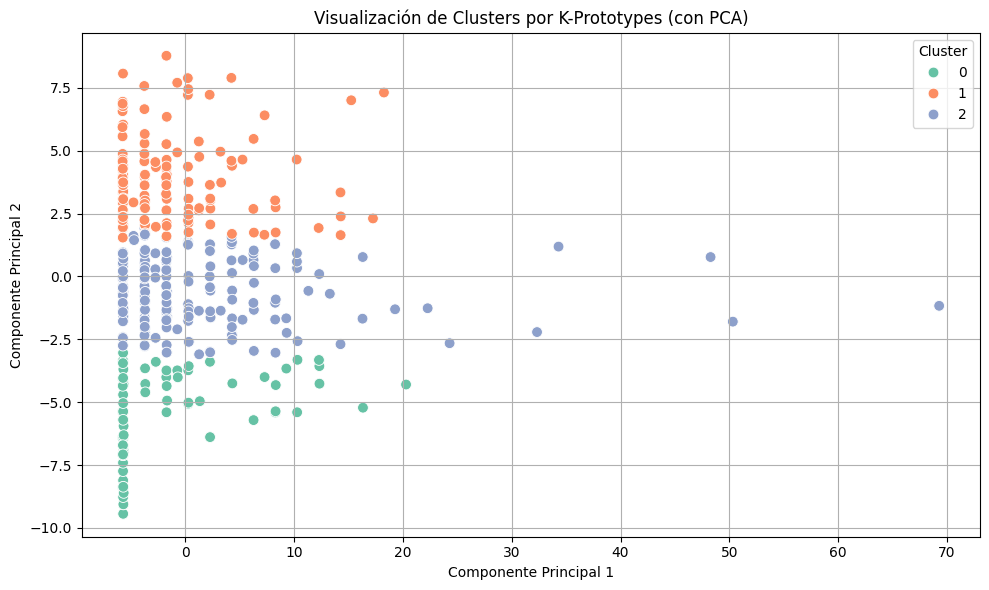

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Agrega los clusters al DataFrame
df_stu_mat['cluster'] = clusters

# Usa PCA para reducir las dimensiones a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame con las componentes principales y los clusters
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title('Visualización de Clusters por K-Prototypes (con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-60-997697257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['cluster'] = clusters


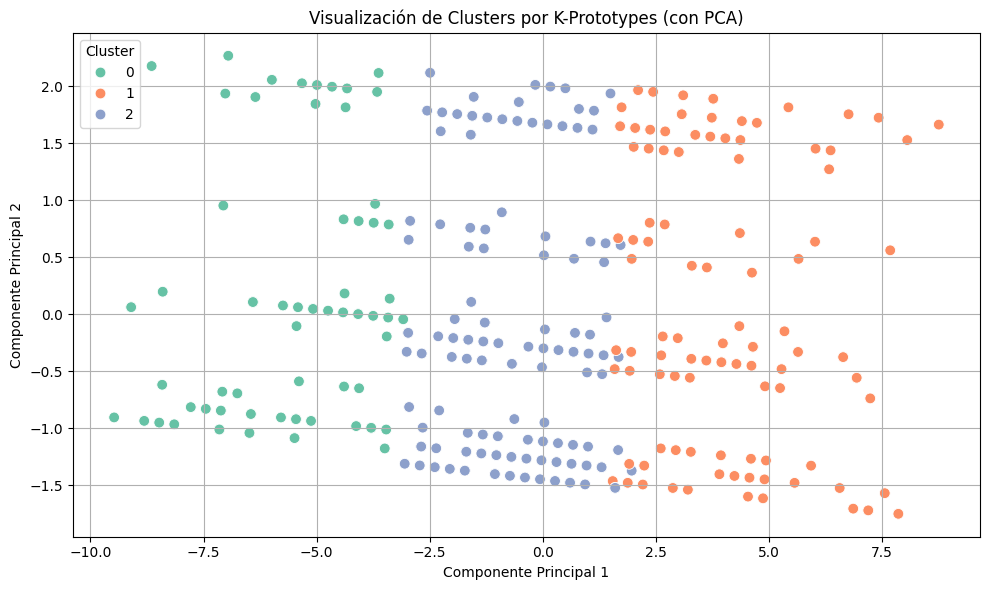

In [60]:
# Agrega los clusters al DataFrame
X2['cluster'] = clusters

# Usa PCA para reducir las dimensiones a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X2)

# Crear un DataFrame con las componentes principales y los clusters
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title('Visualización de Clusters por K-Prototypes (con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()